In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	24
float64		column 3	4
float64		column 4	4
float64		column 5	2
float64		column 6	2
float64		column 7	4
float64		column 8	10
float64		column 9	6
float64		column 10	6
float64		column 11	8
float64		column 12	2


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,800.000000,776.000000,796.000000,796.000000,798.000000,798.000000,796.000000,790.000000,794.000000,794.000000,792.000000,798.000000
mean,1.507570,1.236921,1.979726,1.936355,1.985325,2.006111,1.955847,2.002667,1.993551,1.984005,1.961679,1.965546
std,2.748689,3.640955,1.146403,1.165035,1.167850,1.143285,1.169333,1.137565,1.141734,1.153493,1.183473,1.125390
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.426255,-1.621150,1.019350,0.927960,0.975450,0.990855,0.944333,0.991475,1.059775,1.022400,0.891135,1.001800
50%,0.969530,0.564195,1.968150,1.902350,2.021450,2.006650,1.960500,2.006050,1.980000,1.996300,1.947500,1.956350
75%,3.973350,4.488550,2.925475,2.939575,2.989075,3.015300,2.984625,2.940625,3.002575,2.977550,3.038575,2.871875
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

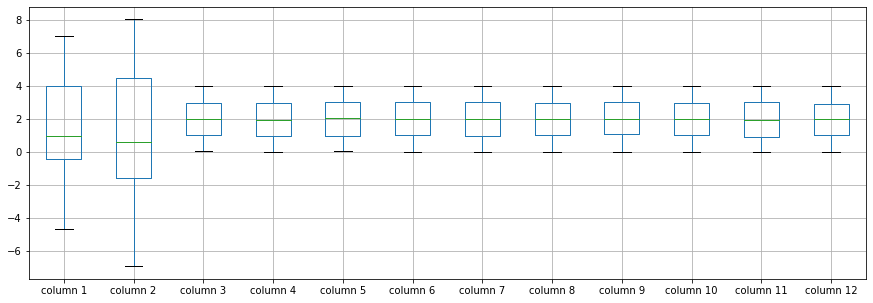

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.507570
column 2     1.236921
column 3     1.979726
column 4     1.936355
column 5     1.985325
column 6     2.006111
column 7     1.955847
column 8     2.002667
column 9     1.993551
column 10    1.984005
column 11    1.961679
column 12    1.965546
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.437672,-0.019545,0.000172,0.039100,0.043801,-0.005947,0.013630,-0.005073,0.007812,0.030054,0.024927
column 2,-0.437672,1.000000,-0.008862,-0.025857,-0.021823,-0.011975,0.034207,-0.014672,0.001613,-0.050294,-0.092715,0.029586
column 3,-0.019545,-0.008862,1.000000,-0.030819,0.073492,0.005039,0.025728,-0.003208,0.001851,-0.009272,-0.037272,0.007385
column 4,0.000172,-0.025857,-0.030819,1.000000,0.002771,-0.033195,0.039341,0.034108,-0.024121,0.043269,0.044621,-0.011946
column 5,0.039100,-0.021823,0.073492,0.002771,1.000000,0.047676,0.020647,0.013234,-0.014252,-0.017062,-0.006143,0.006377
column 6,0.043801,-0.011975,0.005039,-0.033195,0.047676,1.000000,-0.071776,0.034769,0.028417,0.001561,-0.036258,-0.004453
column 7,-0.005947,0.034207,0.025728,0.039341,0.020647,-0.071776,1.000000,-0.041831,-0.014786,-0.053105,-0.016451,-0.003941
column 8,0.013630,-0.014672,-0.003208,0.034108,0.013234,0.034769,-0.041831,1.000000,-0.049924,-0.053480,0.003166,-0.051337
column 9,-0.005073,0.001613,0.001851,-0.024121,-0.014252,0.028417,-0.014786,-0.049924,1.000000,0.043913,-0.009912,-0.020906
column 10,0.007812,-0.050294,-0.009272,0.043269,-0.017062,0.001561,-0.053105,-0.053480,0.043913,1.000000,-0.064750,0.049033


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+100,12+100+100,12+100+100,12+100+100+100+100,12+100+100+100,12+100+100,12+100,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.305639572143555
Epoch: 1 , loss: 28.622024574279784
Epoch: 2 , loss: 25.32877296447754
Epoch: 3 , loss: 23.91041961669922
Epoch: 4 , loss: 23.20781795501709
Epoch: 5 , loss: 22.797658767700195
Epoch: 6 , loss: 22.33100425720215
Epoch: 7 , loss: 22.076859397888185
Epoch: 8 , loss: 21.68530902862549
Epoch: 9 , loss: 21.18945972442627
Epoch: 10 , loss: 20.989483909606932
Epoch: 11 , loss: 20.853099670410156
Epoch: 12 , loss: 20.696230392456055
Epoch: 13 , loss: 20.684979400634766
Epoch: 14 , loss: 20.281746559143066
Epoch: 15 , loss: 20.093886642456056
Epoch: 16 , loss: 20.197468910217285
Epoch: 17 , loss: 20.14552536010742
Epoch: 18 , loss: 20.005645790100097
Epoch: 19 , loss: 19.97163017272949
Epoch: 20 , loss: 19.852604370117188
Epoch: 21 , loss: 19.630629653930665
Epoch: 22 , loss: 19.749774169921874
Epoch: 23 , loss: 19.84050594329834
Epoch: 24 , loss: 19.76023742675781
Epoch: 25 , loss: 19.585435

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(20.277920824007982, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.08169267893361454

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_AW_1(imp).xlsx", index=False, header=False)